In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# read data csv
df = pd.read_csv('netflix1.csv')

# look into dataframe
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


Summary
* show_id: netflix show id
* type: type of show (movie or TV show)
* title: title of the show
* director: name of director
* country: country origin of the show
* date_added: recorded date time when the movie added to netflix
* release_year: year when the show released
* rating: the age restriction
* duration: duration of the show
* listed_in: the show category

In [ ]:
# dataframe shape
df.shape

(8790, 10)

In [ ]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


We see that one feature is numeric (int64), and 9 features are object. In addition, we also can identifiy if there are any missing values. Here, there are none because each column contains 8790 observations, the same number of rows we saw before with shape.

In [ ]:
# inspect any null value
df.describe(include='all')

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790
unique,8790,2,8787,4528,86,1713,NaN,14,220,513
top,s1,Movie,9-Feb,Not Given,United States,1/1/2020,NaN,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,NaN,3205,1791,362
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.183163,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.825466,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN


In [ ]:
# look into countries in the list
df['country'].unique()

array(['United States', 'France', 'Brazil', 'United Kingdom', 'India',
       'Germany', 'Pakistan', 'Not Given', 'China', 'South Africa',
       'Japan', 'Nigeria', 'Spain', 'Philippines', 'Australia',
       'Argentina', 'Canada', 'Hong Kong', 'Italy', 'New Zealand',
       'Egypt', 'Colombia', 'Mexico', 'Belgium', 'Switzerland', 'Taiwan',
       'Bulgaria', 'Poland', 'South Korea', 'Saudi Arabia', 'Thailand',
       'Indonesia', 'Kuwait', 'Malaysia', 'Vietnam', 'Lebanon', 'Romania',
       'Syria', 'United Arab Emirates', 'Sweden', 'Mauritius', 'Austria',
       'Turkey', 'Czech Republic', 'Cameroon', 'Netherlands', 'Ireland',
       'Russia', 'Kenya', 'Chile', 'Uruguay', 'Bangladesh', 'Portugal',
       'Hungary', 'Norway', 'Singapore', 'Iceland', 'Serbia', 'Namibia',
       'Peru', 'Mozambique', 'Ghana', 'Zimbabwe', 'Israel', 'Finland',
       'Denmark', 'Paraguay', 'Cambodia', 'Georgia', 'Soviet Union',
       'Greece', 'West Germany', 'Iran', 'Venezuela', 'Slovenia',
       'Gua

We can see 'Not Given' country name in the second row above. Means that the coloumns is not empty but the origin country of several shows were unkown.

In [ ]:
df.nunique(axis=0)

show_id         8790
type               2
title           8787
director        4528
country           86
date_added      1713
release_year      74
rating            14
duration         220
listed_in        513
dtype: int64

There are only two type of show in the dataframe, and the show are from 86 countries. We can draw the categorical data from type, country, release year, and rating.

**Next, we shall see from data visualization.**

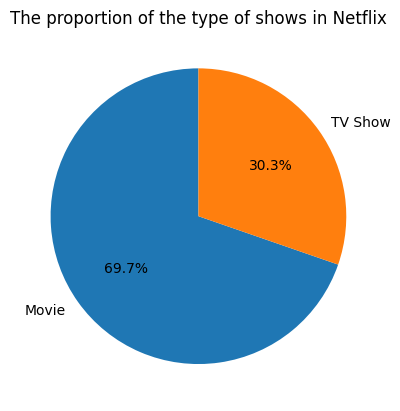

In [ ]:
# see the proportion type of the show
y = df.groupby('type')['show_id'].count()
labels = ['Movie', 'TV Show']

plt.pie(y, labels = labels, autopct='%1.1f%%', startangle=90)
plt.title('The proportion of the type of shows in Netflix')
plt.show()

There are a lot of movie in Netflix with approx 70% from total.

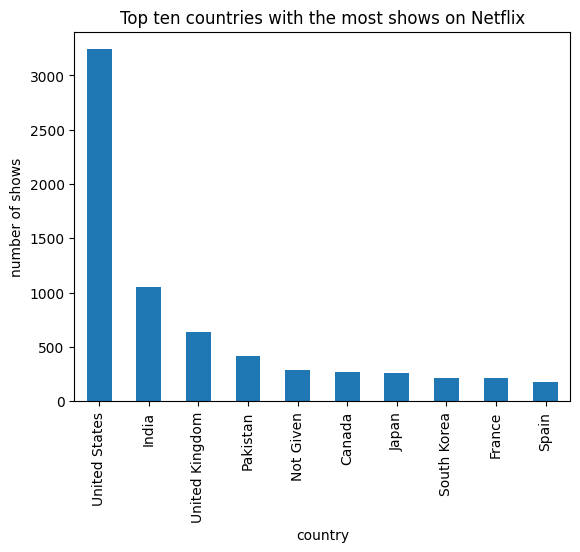

In [ ]:
# top ten coutries with the majority of shows
per_country = df.groupby('country')['show_id'].count()

per_country.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top ten countries with the most shows on Netflix')
plt.xlabel('country')
plt.ylabel('number of shows')
plt.show()

Majority of shows in Netflix originates from United states with the rough total 3300 shows. Following by India with the total around 1000 shows, and UK with the total show about 200 fewer than India. Apart from these three countries, shows from other countries (on the list) only have less than 500 shows on Netflix.

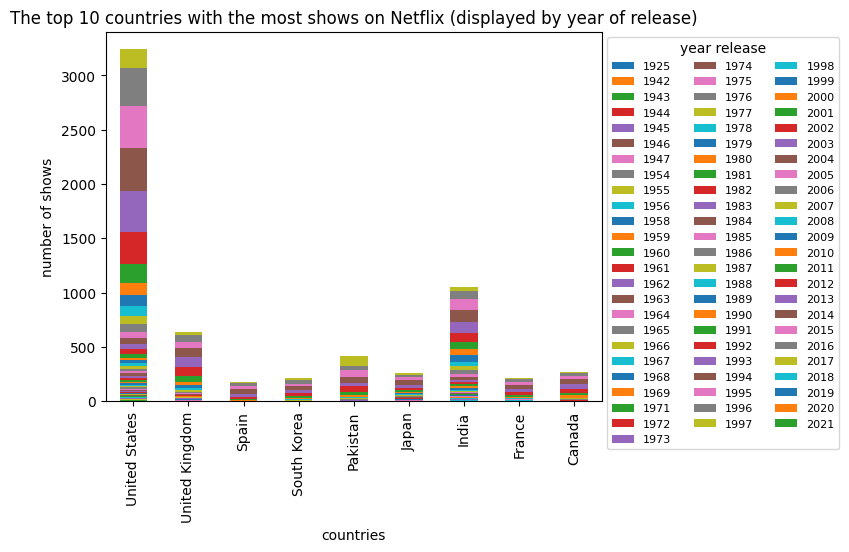

In [ ]:

country_n_year = df.groupby(['country', 'release_year'])['show_id'].count()

labels = ['United States','India','United Kingdom','Pakistan','Canada','Japan','South Korea','France','Spain']
selected = country_n_year.loc[labels]
selected = selected.sort_index(level=['country','release_year'], ascending=[False, True])

legenda = selected.index.unique('release_year').sort_values(ascending=True)

selected.unstack().plot(kind='bar', stacked=True)
plt.title('The top 10 countries with the most shows on Netflix (displayed by year of release)')
plt.ylabel('number of shows')
plt.xlabel('countries')
plt.legend(title='year release', labels=legenda, bbox_to_anchor=(1.0,1.0), loc='upper left', ncol=3, fontsize = 8)
plt.show()

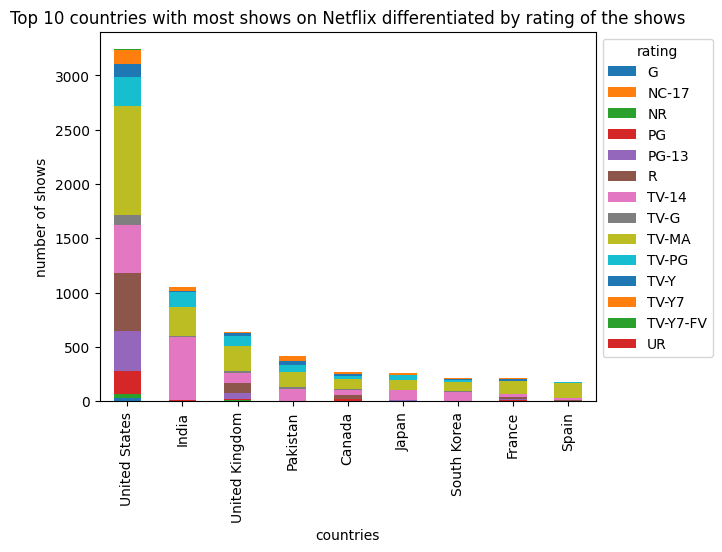

In [ ]:
# rating
country_n_rating = df.groupby(['country', 'rating'])['show_id'].count()

labels = ['United States','India','United Kingdom','Pakistan','Canada','Japan','South Korea','France','Spain']
selected = country_n_rating.loc[labels]
selected.unstack().plot(kind='bar', stacked=True)
plt.title('Top 10 countries with most shows on Netflix differentiated by rating of the shows')
plt.ylabel('number of shows')
plt.xlabel('countries')
plt.legend(title='rating', bbox_to_anchor=(1.0,1.0), loc='upper left')
plt.show()

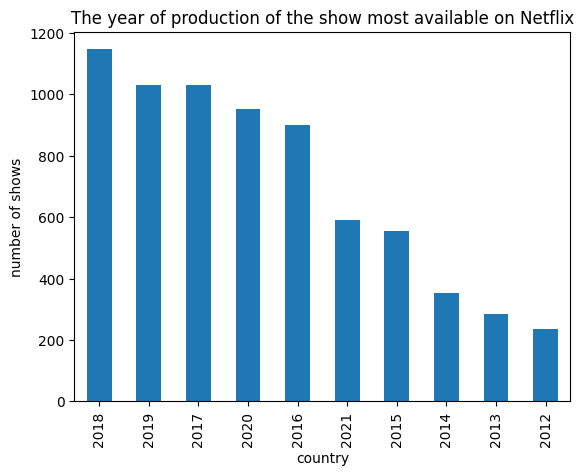

In [ ]:
# in what year most produced show available in Netflix
country_year = df.groupby('release_year')['show_id'].count()

country_year.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('The year of production of the show most available on Netflix')
plt.xlabel('country')
plt.ylabel('number of shows')
plt.show()

In [ ]:
# is show on netflix availabe at the same time as the year when the show produced

In [ ]:
# seasonal TV shows? how many?

In [ ]:
# director with the most produced show available in netflix
df.groupby('director')['show_id'].count().sort_values(ascending=False).head(10)

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: show_id, dtype: int64

In [ ]:
# the most keyword in title (common title) or same title but different show?